In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/kaggle/input/concrete-data/Concrete_Data.csv")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Now lets divided the independent and dependent variable
x = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [5]:
# Now lets split the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
# Now lets perform the lr
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)

array([59.65804162, 52.0412113 , 63.53513339, 51.57545676, 17.22001733,
       39.86561321, 26.6982471 , 44.73648869, 29.36619785, 38.18612542,
       27.76438338, 19.81055461, 66.8940356 , 52.28562112, 29.96928612,
       44.45926401, 29.2284856 , 26.53340084, 31.98162681, 32.03208356,
       36.82327256, 31.77175527, 38.07286862, 25.12353728, 33.0993284 ,
       33.85670933, 14.24140345, 40.33250901, 41.88282591, 21.33261142,
       35.71648095, 30.96693001, 43.87446203, 45.52648807, 30.7629146 ,
       29.59299935, 28.90650584, 38.85005738, 20.34631763, 38.45267413,
       21.16537625, 15.88280149, 31.06077771, 50.70684031, 20.26957631,
       57.64501168, 50.90245564, 60.96378987, 20.00393916, 19.22241454,
       40.4816289 , 36.23627397, 30.01525382, 33.42739866, 46.66492833,
       51.47376399, 27.73605695, 15.69651113, 29.69654891, 18.12447629,
       38.63227644, 20.52725493, 31.56412397, 55.48969297, 22.93752175,
       21.34689286, 32.26933604, 16.70816961, 25.40482587, 25.56

In [7]:
y_pred = lr.predict(x_test)

In [8]:
r2_score(y_pred,y_test)

0.42317047978909783

In [9]:
cross_val_score(lr,x_train,y_train,scoring='r2').mean()

0.594605539199253

In [10]:
# Now lets perform the yeo-john method
pt = PowerTransformer()

In [11]:
x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.fit_transform(x_test)

In [12]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
lr.predict(x_test_transformed)

array([50.7412843 , 46.649905  , 66.52013279, 40.04500643, 13.02371587,
       46.6831763 , 27.2307539 , 49.21530632, 30.88018934, 46.77554428,
       36.94386357, 16.59153492, 54.92634455, 41.32011331, 28.58076887,
       27.03513731, 32.8771053 , 23.22350876, 40.40838059, 28.36996293,
       40.81490458, 29.43745463, 43.34679679,  7.34031104, 37.20010289,
       36.23023549, 10.9537096 , 50.28343012, 44.0984219 , 13.65465718,
       42.50350564, 37.27976835, 41.42062834, 50.74602338, 16.20747114,
       38.33759423, 30.45013676, 46.52651508,  8.39291923, 44.47889268,
       18.90299299, -2.61028435, 38.06623665, 56.76765897,  7.39992462,
       63.32684737, 52.53038168, 49.54561733, 26.47874144,  2.08503489,
       46.92684801, 44.33073949, 25.83398927, 19.77326764, 46.99921676,
       39.49095058, 25.0898976 , 13.93641792, 33.63737895, 25.35554177,
       46.37071833, 13.87250567, 35.87107098, 53.56619995, 29.15326154,
       23.01057497, 39.56694696, 18.18251632, 29.82437371, 24.34

In [13]:
y_pred = lr.predict(x_test_transformed)

In [14]:
r2_score(y_pred,y_test)

0.7912736991498317

In [15]:
cross_val_score(lr,x_train_transformed,y_train,scoring='r2').mean()

0.7941782180737021

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


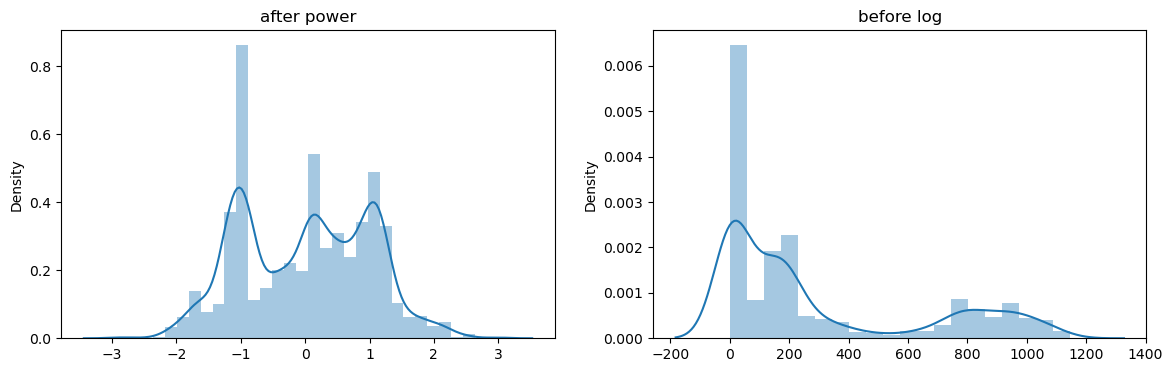

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train_transformed)
plt.title('after power')

plt.subplot(122)
sns.distplot(x_train)
plt.title("before log")
plt.show()